In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


In [2]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [3]:
train.head()

content_id                              title content_type    genre  \
0      645543             The Surreal Conspiracy  Documentary    Drama   
1      939316           Astro Saga in the Cosmos  Documentary    Drama   
2      280014  Synthesizing the Eternal Artifact        Movie   Action   
3      215181      The Artifact of Savage Zenith        Movie  Romance   
4      241683   Resonating the Spectral Prophecy        Movie    Drama   

    sub_genre  release_year  language country_of_origin content_age_rating  \
0  Historical          2013   Spanish               USA                 PG   
1       Crime          2023  Japanese               USA                 PG   
2      Satire          2000  Japanese               USA                 PG   
3      Satire          2019   English                UK                  G   
4  Historical          1993   Spanish               USA              PG-13   

         budget  ...  completion_rate   total_views  avg_watch_time  \
0  6.744258e+06  ...        85.792005   8067.786265       20.718243   
1  6.178134e+06  ...        80.437724    750.473993       24.262058   
2  1.588919e+07  ...        82.882434  77701.229657       10.776592   
3           NaN  ...        80.022574   4411.172846       11.376984   
4  1.518643e+07  ...        72.209335  11678.765250        6.219910   

        revenue  awards  critic_score  user_engagement_score  marketing_spend  \
0   2835.071735       7     87.991891             110.000000     2.281850e+06   
1    655.016451       4     91.867209              85.750069     1.601333e+06   
2  19516.690216       3     66.761330              90.000000     5.274652e+06   
3   2701.183619       4     58.300367             113.564852     1.815005e+07   
4  16938.114373       1     47.234645              64.426039     4.809484e+06   

   licensing_cost  user_retention  
0     1481.325232    4.910349e+19  
1      195.900521             NaN  
2    15457.226653    4.901917e+23  
3      921.621615    1.672483e+15  
4    15134.227463    2.539603e+08  

[5 rows x 23 columns]

## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler for the range 0-100
scaler = MinMaxScaler(feature_range=(0, 100))

# Assuming the column for user retention is 'user_retention'
# Apply logarithmic transformation first (make sure values are positive)
train['user_retention_log'] = np.log1p(train['user_retention'])

# Then scale the log-transformed values between 0 and 100
train['user_retention_scaled'] = scaler.fit_transform(train[['user_retention_log']])

# Display the first few rows to check the transformation and scaling
print(train[['user_retention', 'user_retention_log', 'user_retention_scaled']].head())


   user_retention  user_retention_log  user_retention_scaled
0    4.910349e+19           45.340462              53.350761
1             NaN                 NaN                    NaN
2    4.901917e+23           54.549083              64.186270
3    1.672483e+15           35.053086              41.245914
4    2.539603e+08           19.352688              22.771728


In [5]:
train.isnull().sum()

content_id                   0
title                        0
content_type                 0
genre                        0
sub_genre                    0
release_year                 0
language                     0
country_of_origin            0
content_age_rating           0
budget                   40075
runtime                      0
imdb_rating              39934
streamly_rating              0
completion_rate              0
total_views                  0
avg_watch_time               0
revenue                  40081
awards                       0
critic_score             39642
user_engagement_score    40164
marketing_spend              0
licensing_cost               0
user_retention           39921
user_retention_log       39921
user_retention_scaled    39921
dtype: int64

In [6]:
train.head()

content_id                              title content_type    genre  \
0      645543             The Surreal Conspiracy  Documentary    Drama   
1      939316           Astro Saga in the Cosmos  Documentary    Drama   
2      280014  Synthesizing the Eternal Artifact        Movie   Action   
3      215181      The Artifact of Savage Zenith        Movie  Romance   
4      241683   Resonating the Spectral Prophecy        Movie    Drama   

    sub_genre  release_year  language country_of_origin content_age_rating  \
0  Historical          2013   Spanish               USA                 PG   
1       Crime          2023  Japanese               USA                 PG   
2      Satire          2000  Japanese               USA                 PG   
3      Satire          2019   English                UK                  G   
4  Historical          1993   Spanish               USA              PG-13   

         budget  ...  avg_watch_time       revenue  awards  critic_score  \
0  6.744258e+06  ...       20.718243   2835.071735       7     87.991891   
1  6.178134e+06  ...       24.262058    655.016451       4     91.867209   
2  1.588919e+07  ...       10.776592  19516.690216       3     66.761330   
3           NaN  ...       11.376984   2701.183619       4     58.300367   
4  1.518643e+07  ...        6.219910  16938.114373       1     47.234645   

   user_engagement_score  marketing_spend  licensing_cost  user_retention  \
0             110.000000     2.281850e+06     1481.325232    4.910349e+19   
1              85.750069     1.601333e+06      195.900521             NaN   
2              90.000000     5.274652e+06    15457.226653    4.901917e+23   
3             113.564852     1.815005e+07      921.621615    1.672483e+15   
4              64.426039     4.809484e+06    15134.227463    2.539603e+08   

   user_retention_log  user_retention_scaled  
0           45.340462              53.350761  
1                 NaN                    NaN  
2           54.549083              64.186270  
3           35.053086              41.245914  
4           19.352688              22.771728  

[5 rows x 25 columns]

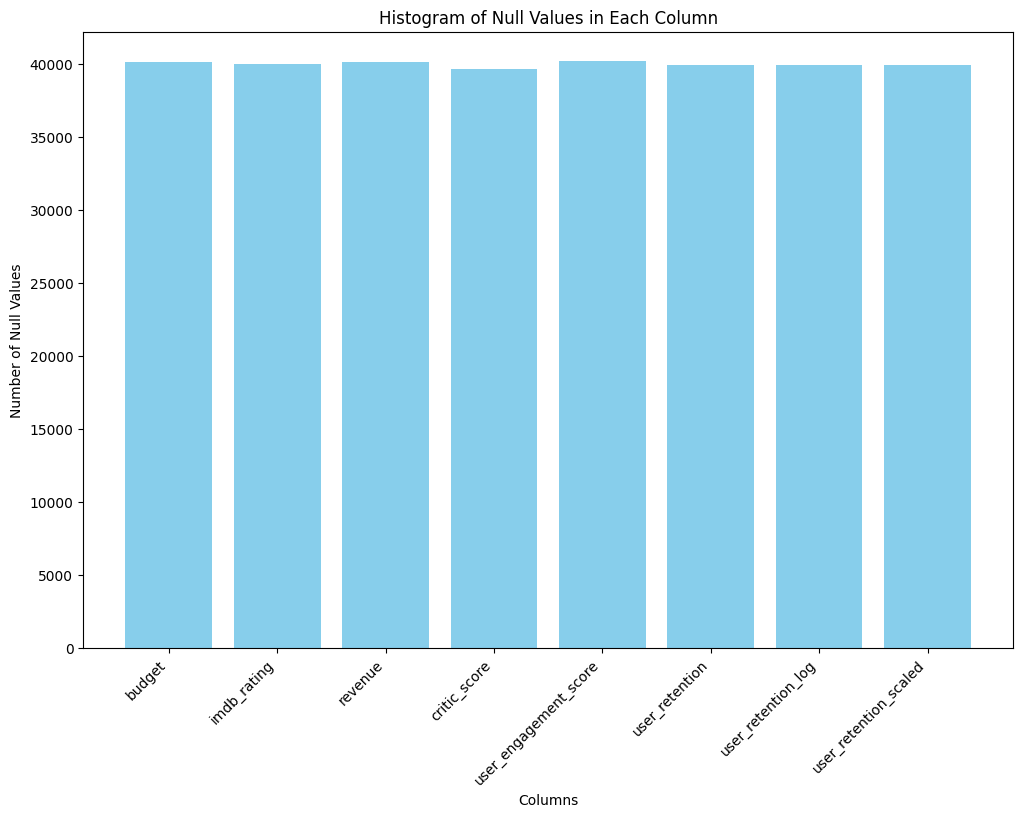

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided null value data
null_values = {
    'Column': [
        'budget', 'imdb_rating', 'revenue', 'critic_score', 
        'user_engagement_score', 'user_retention', 
        'user_retention_log', 'user_retention_scaled'
    ],
    'Null Count': [
        40075, 39934, 40081, 39642, 
        40164, 39921, 39921, 39921
    ]
}

null_df = pd.DataFrame(null_values)

# Plotting the histogram of null values
plt.figure(figsize=(12, 8))
plt.bar(null_df['Column'], null_df['Null Count'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Histogram of Null Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


# Print column names to verify
print("Columns in dataset:", train.columns)

# Automatically identify numerical columns with missing values
numerical_cols = train.select_dtypes(include=[np.number]).columns
missing_numerical_cols = [col for col in numerical_cols if train[col].isnull().any()]

def fill_missing_with_xgboost(train, column):
    """
    Fill missing values in a specific numerical column using XGBoost.
    The other columns are used as predictors.
    """
    # Split the data into two parts: known values and missing values
    train_known = train[train[column].notnull()]
    train_missing = train[train[column].isnull()]
    
    if train_missing.shape[0] == 0:
        return train  # No missing values in this column
    
    # Define the features and target for training
    X_known = train_known.drop(columns=[column])
    y_known = train_known[column]
    
    X_missing = train_missing.drop(columns=[column])

    # Handle categorical features: Encode them
    categorical_cols = X_known.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        combined_data = pd.concat([X_known[col].astype(str), X_missing[col].astype(str)], axis=0)
        le.fit(combined_data)
        X_known[col] = le.transform(X_known[col].astype(str))
        X_missing[col] = le.transform(X_missing[col].astype(str))
        label_encoders[col] = le

    # Train an XGBoost model on the known values
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_known, y_known)
    
    # Predict the missing values
    predicted_values = model.predict(X_missing)
    
    # Fill the missing values with predictions
    train.loc[train[column].isnull(), column] = predicted_values
    return train

# Impute missing values for numerical columns with missing values
for col in missing_numerical_cols:
    print(f"Imputing missing values for column: {col}")
    train = fill_missing_with_xgboost(train, col)

# Check if there are any missing values left
print(train.isnull().sum())

print("Missing values have been filled.")


Columns in dataset: Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention', 'user_retention_log',
       'user_retention_scaled'],
      dtype='object')
Imputing missing values for column: budget
Imputing missing values for column: imdb_rating
Imputing missing values for column: revenue
Imputing missing values for column: critic_score
Imputing missing values for column: user_engagement_score
Imputing missing values for column: user_retention
Imputing missing values for column: user_retention_log
Imputing missing values for column: user_retention_scaled
content_id               0
title                    0
content_type             0
genre             

In [9]:
train.isnull().sum()


content_id               0
title                    0
content_type             0
genre                    0
sub_genre                0
release_year             0
language                 0
country_of_origin        0
content_age_rating       0
budget                   0
runtime                  0
imdb_rating              0
streamly_rating          0
completion_rate          0
total_views              0
avg_watch_time           0
revenue                  0
awards                   0
critic_score             0
user_engagement_score    0
marketing_spend          0
licensing_cost           0
user_retention           0
user_retention_log       0
user_retention_scaled    0
dtype: int64

**Data Transformation:**

Transforms user_retention using logarithmic scaling and normalizes it to a range of 0-100.

**Null Value Visualization:**

Creates and plots a histogram of null values across various columns to visualize missing data distribution.'

**Missing Value Imputation:**

Identifies numerical columns with missing values and imputes them using an XGBoost model, encoding categorical features as needed. Checks for remaining missing values afterward.


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

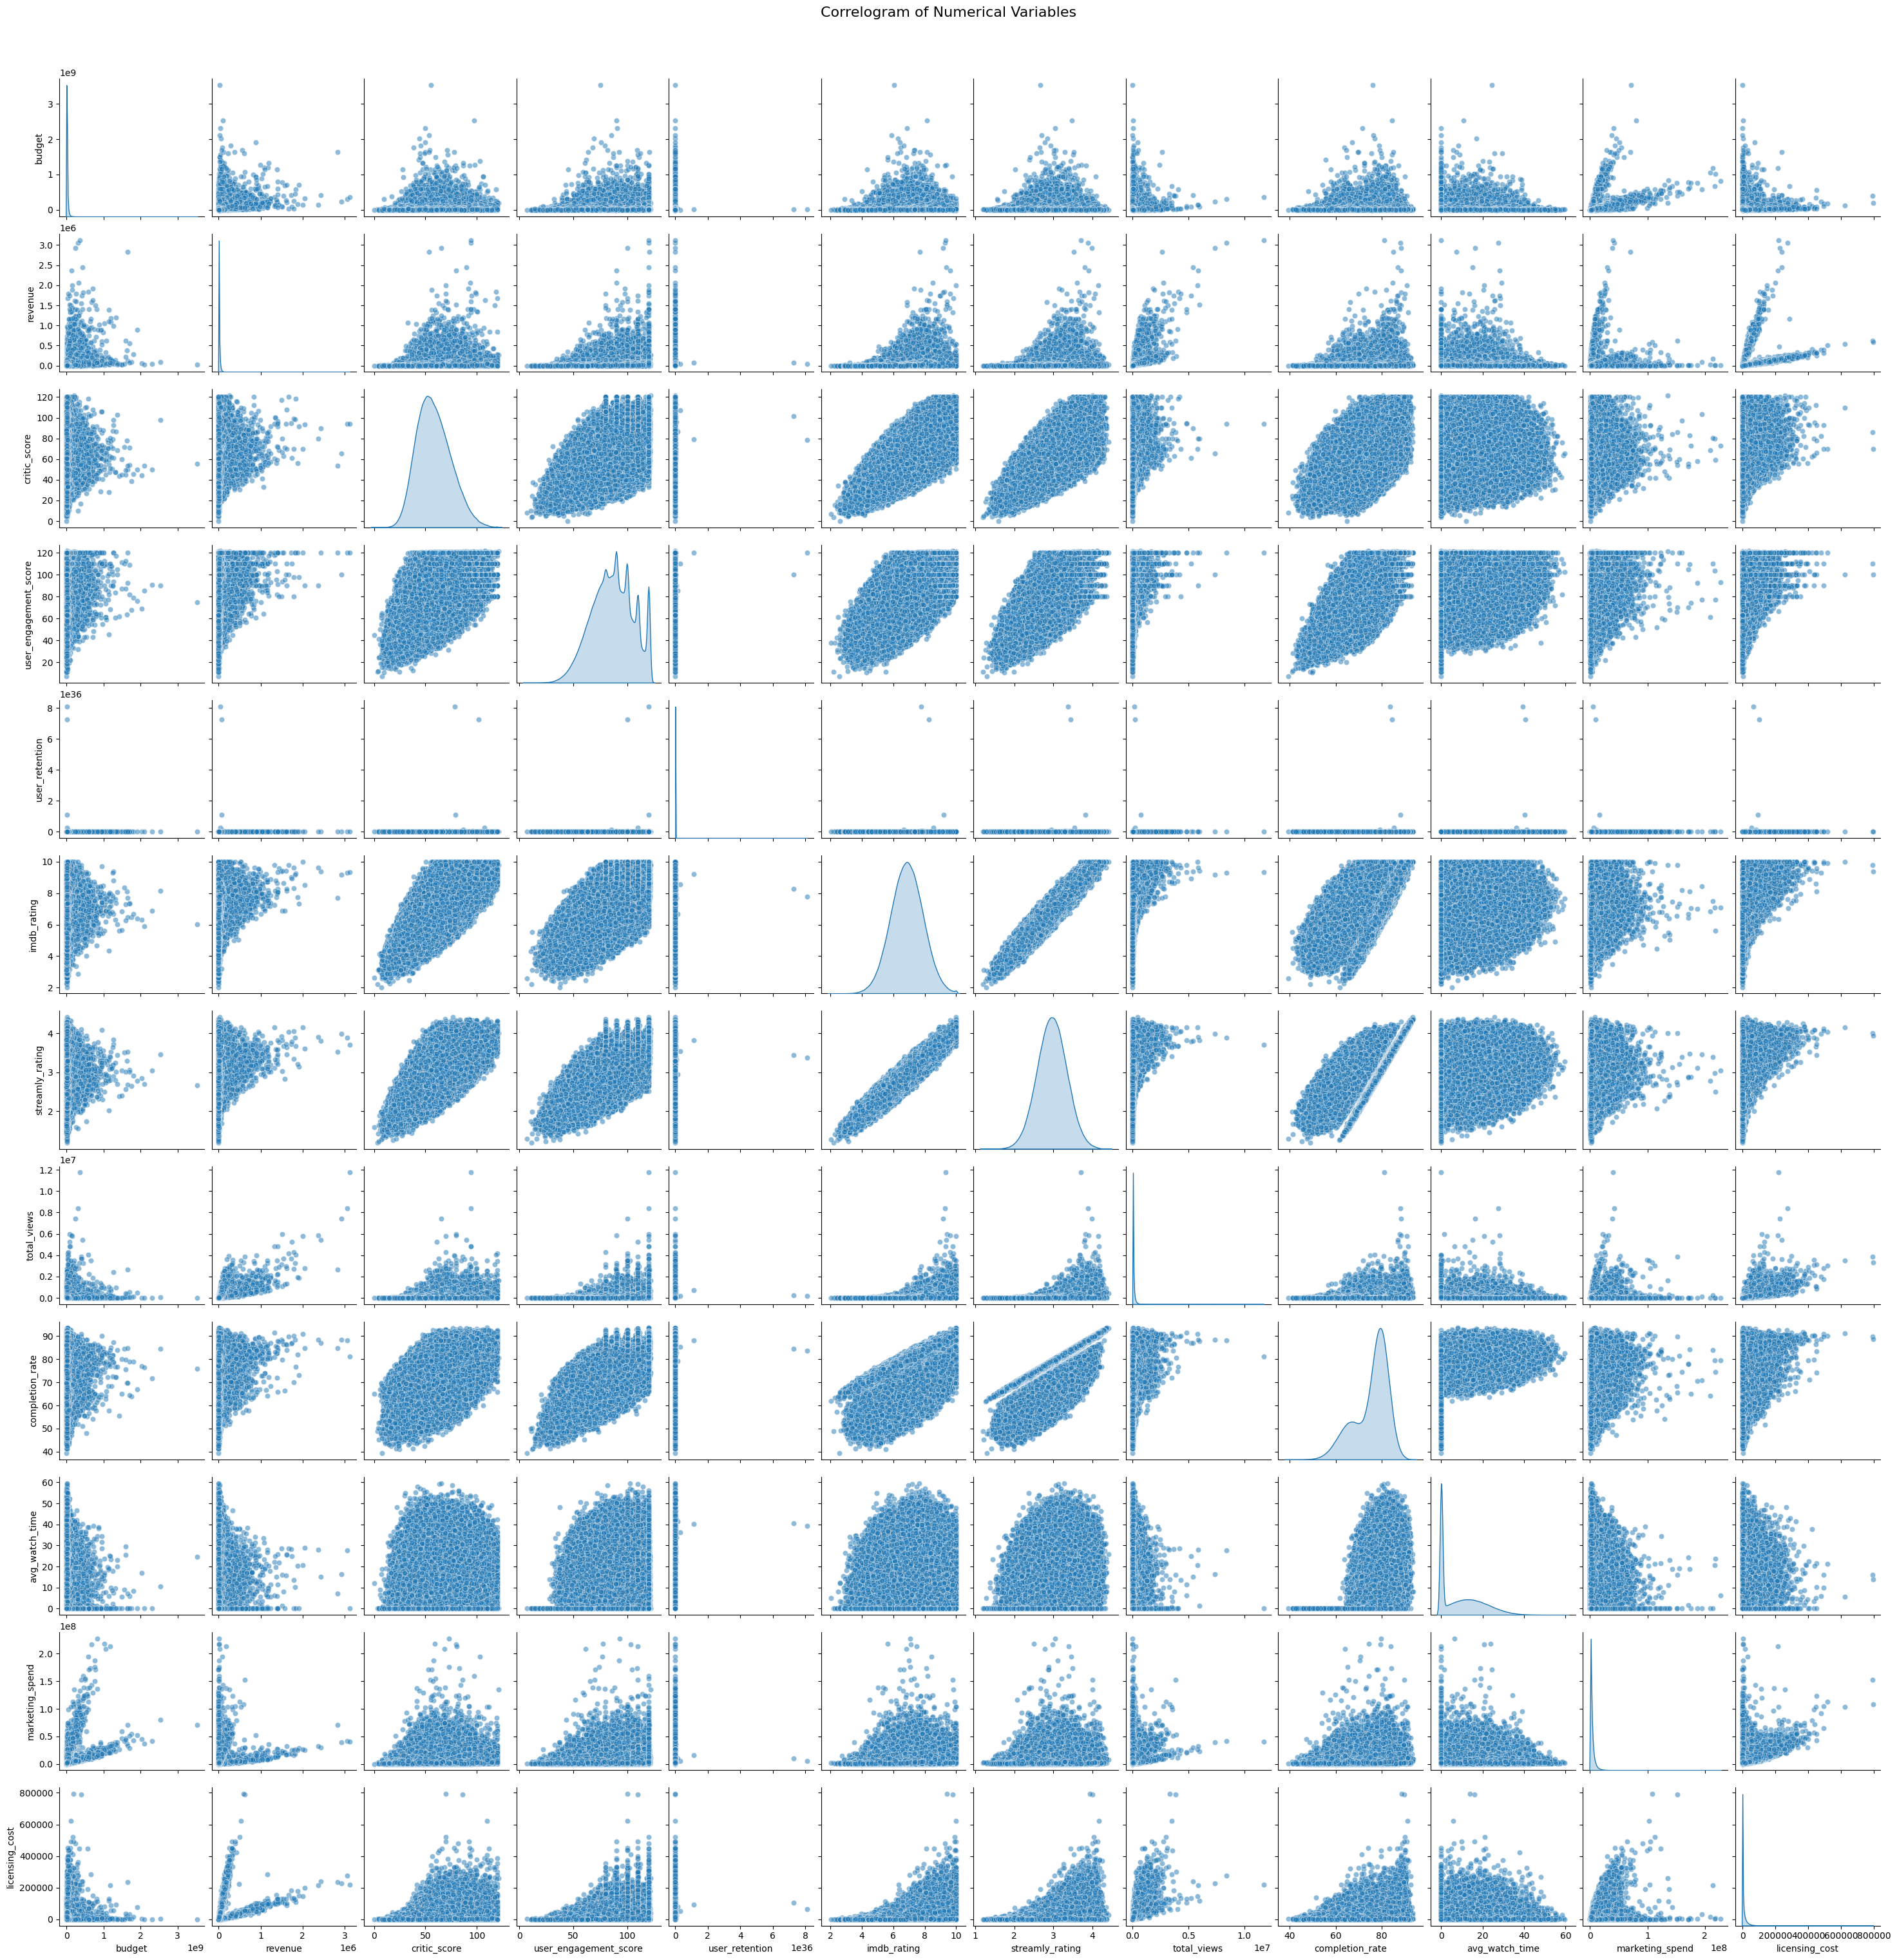

In [10]:
# Your code here, along with reasoning


import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Visualize relationships between variables with a correlogram
numerical_columns = ['budget', 'revenue', 'critic_score', 'user_engagement_score', 'user_retention',
                     'imdb_rating', 'streamly_rating', 'total_views', 'completion_rate',
                     'avg_watch_time', 'marketing_spend', 'licensing_cost']

# Plot correlogram (pairwise relationships between numerical variables)
sns.pairplot(train[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Correlogram of Numerical Variables', y=1.02, fontsize=16)
plt.show()


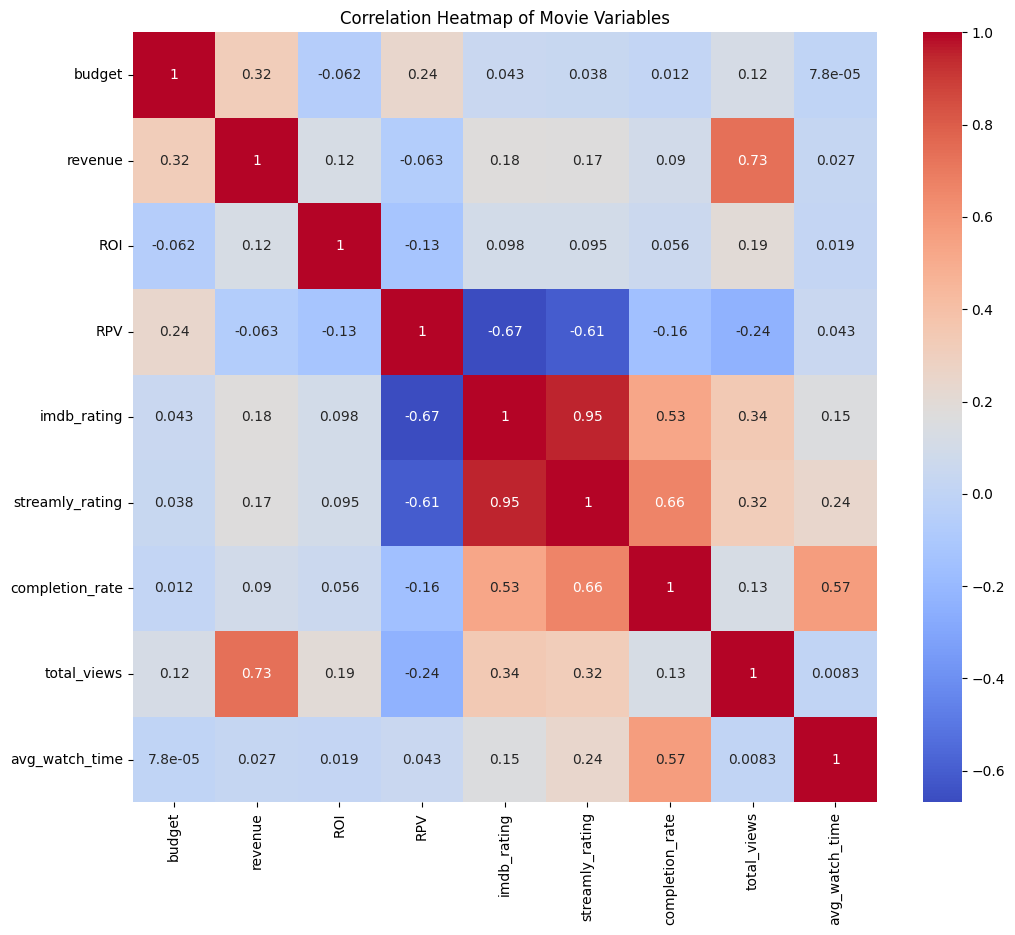

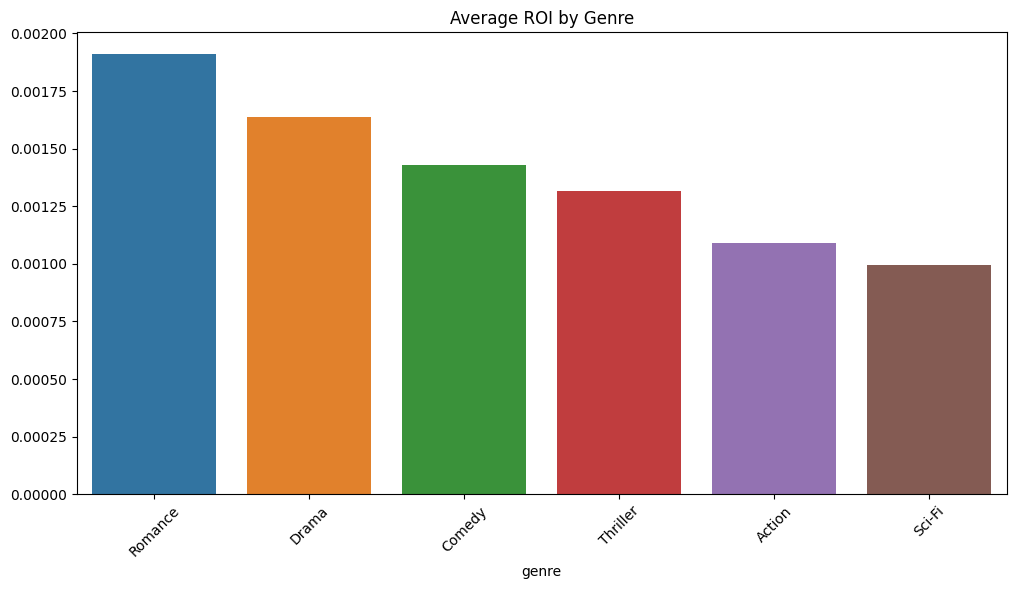

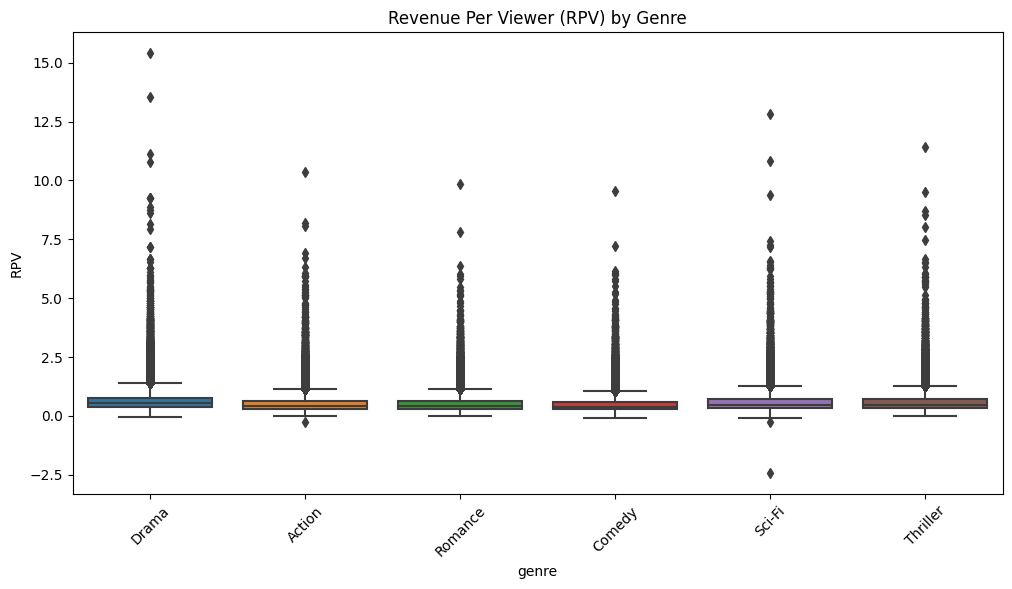

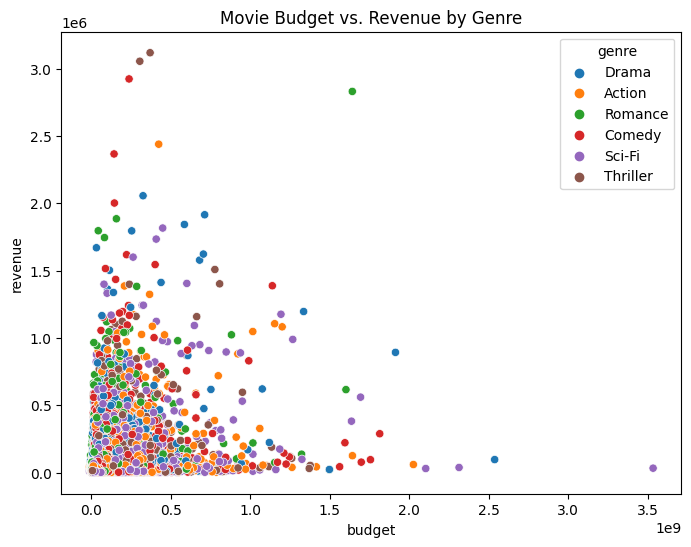

Genres with the highest average ROI:
genre
Romance     0.001909
Drama       0.001638
Comedy      0.001429
Thriller    0.001314
Action      0.001089
Name: ROI, dtype: float64

Genres with the highest Revenue Per Viewer (RPV):
genre
Drama       0.626664
Sci-Fi      0.562047
Thriller    0.561797
Action      0.512268
Romance     0.511330
Name: RPV, dtype: float64

Movies with the highest ROI (top 5%):
                                                    title     genre  \
17        Conjuring in the Quantum Realm: The Plasma Saga    Comedy   
27                                        The Mystic Saga     Drama   
29                           Neon Voyage across Realities     Drama   
72                        Biopunk Sonnet: A Thriller Tale    Comedy   
125                     Pulsating the Cybernetic Grimoire  Thriller   
...                                                   ...       ...   
799934            The Singularity of Spectral Myth (6IQA)    Sci-Fi   
799936                        T

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' contains the dataset

# 1. Calculate Return on Investment (ROI)
train['ROI'] = train['revenue'] / train['budget']

# 2. Calculate Revenue Per Viewer (RPV)
train['RPV'] = train['revenue'] / train['total_views']

# 3. Visualizations

# a. Correlation Heatmap to find relationships between numerical variables
plt.figure(figsize=(12, 10))
corr_matrix = train[['budget', 'revenue', 'ROI', 'RPV', 'imdb_rating', 'streamly_rating', 'completion_rate', 'total_views', 'avg_watch_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Movie Variables')
plt.show()

# b. Bar plot to visualize ROI across genres
plt.figure(figsize=(12, 6))
roi_by_genre = train.groupby('genre')['ROI'].mean().sort_values(ascending=False)
sns.barplot(x=roi_by_genre.index, y=roi_by_genre.values)
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)
plt.show()

# c. Box plot to visualize Revenue Per Viewer (RPV) across genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='RPV', data=train)
plt.title('Revenue Per Viewer (RPV) by Genre')
plt.xticks(rotation=45)
plt.show()

# d. Scatter plot for budget vs. revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', hue='genre', data=train)
plt.title('Movie Budget vs. Revenue by Genre')
plt.show()

# 4. Analyzing Trends and Insights

# a. ROI analysis
print("Genres with the highest average ROI:")
print(roi_by_genre.head())

# b. Find out which genre has the highest Revenue Per Viewer (RPV)
rpv_by_genre = train.groupby('genre')['RPV'].mean().sort_values(ascending=False)
print("\nGenres with the highest Revenue Per Viewer (RPV):")
print(rpv_by_genre.head())

# c. Examine anomalies or outliers
high_roi_movies = train[train['ROI'] > train['ROI'].quantile(0.95)]
print("\nMovies with the highest ROI (top 5%):")
print(high_roi_movies[['title', 'genre', 'budget', 'revenue', 'ROI']])

# d. Examine counter-intuitive trends
low_budget_high_revenue = train[(train['budget'] < train['budget'].quantile(0.25)) &
                                (train['revenue'] > train['revenue'].quantile(0.75))]
print("\nLow-budget, high-revenue movies:")
print(low_budget_high_revenue[['title', 'genre', 'budget', 'revenue', 'ROI']])

# 5. Conclusion based on findings

**Correlogram:**

Plots pairwise relationships between numerical variables to visualize their correlations and dependencies.

**ROI and RPV Calculations:**

**ROI (Return on Investment):** Measures the efficiency of revenue relative to budget.
**RPV (Revenue Per Viewer):** Assesses revenue generated per viewer.

**Visualizations:**

**Correlation Heatmap:** Shows relationships between key numerical variables.
Bar Plot: Displays average ROI across movie genres.
Box Plot: Illustrates RPV distribution by genre.
Scatter Plot: Compares budget and revenue, highlighting genre differences.

**Analysis and Insights:**

**Top Genres for ROI and RPV:** Identifies genres with the highest ROI and RPV.
High ROI Movies: Lists movies in the top 5% for ROI.
Low-Budget, High-Revenue Movies: Examines movies with high revenue despite low budgets.
Trends and Anomalies: Highlights counter-intuitive findings and trends for further exploration.
This approach helps identify successful movie characteristics and provides actionable insights for content strategy.

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

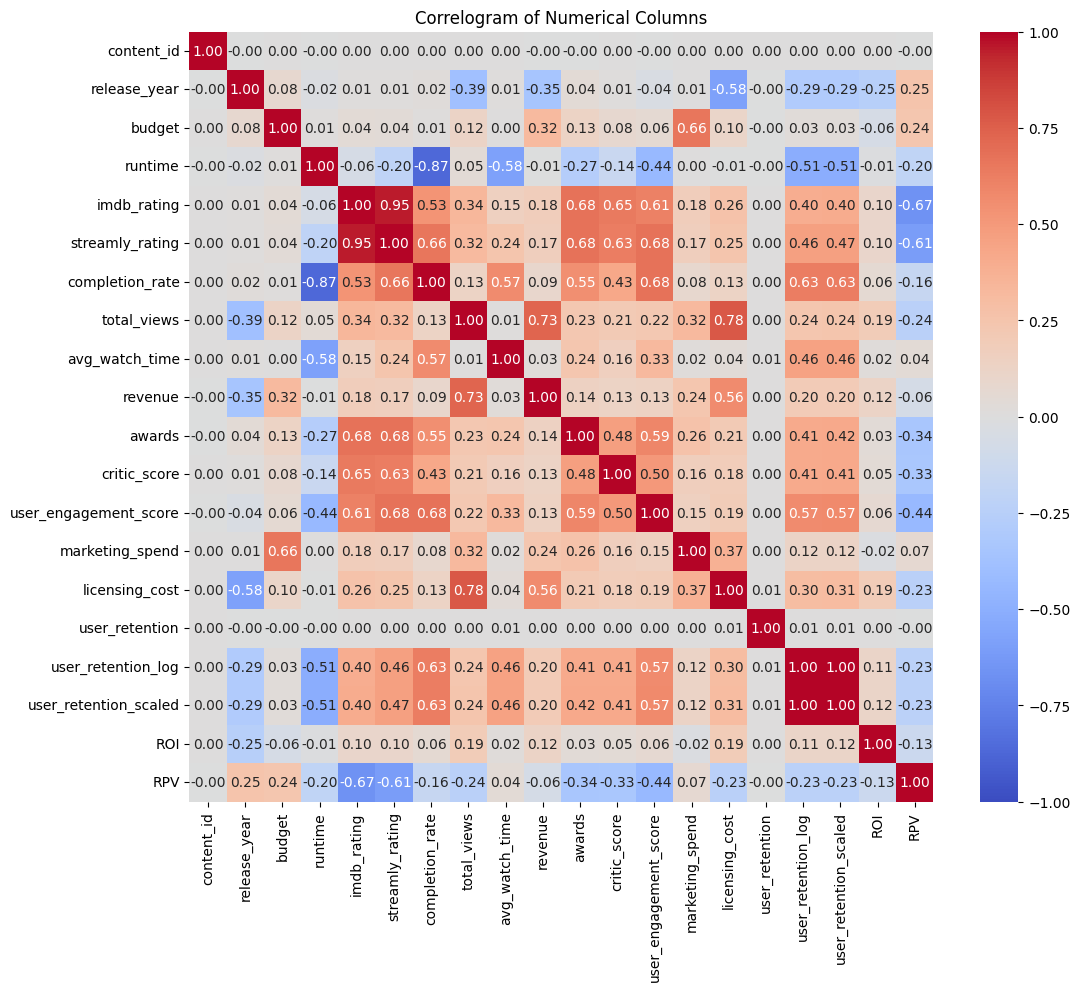

In [12]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Automatically identify numerical columns
numerical_cols = train.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for numerical columns
corr_matrix = train[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlogram of Numerical Columns')
plt.show()


Initial Analysis:

The correlogram reveals relationships between variables and user_retention.

Adjustments:

Feature Engineering: Create new features like ROI and RPV.
Handle Multicollinearity: Reduce redundancy by selecting key features.
Transformations: Apply scaling or normalization.
Updated Correlation Matrix:

Recompute and visualize after adjustments to identify clearer patterns.

Strategies:

Prioritize Key Features: Focus on features strongly correlated with user_retention.
Optimize Investment: Maximize ROI by targeting effective genres and content.
Enhance Viewer Experience: Improve factors like user_engagement_score.

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

# Your code here, along with reasoning
Model Development:

A Multiple Linear Regression (MLR) model is developed to predict user retention based on selected features: completion_rate, user_engagement_score, avg_watch_time, critic_score, and licensing_cost.
Feature Selection and Impact:

Feature Selection: Features are chosen based on their correlation with user retention.
Coefficient Analysis: The model coefficients are analyzed to determine the importance of each feature. Features with larger coefficients have a greater impact on user retention.
Model Evaluation:

Metrics: The model's performance is evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) scores. These metrics indicate how well the model predicts user retention and the accuracy of the predictions.
Visualization:

Feature Coefficients: A bar plot is created to visualize the coefficients of each feature, highlighting their relative importance in the model.
Prediction and Submission:

Test Dataset Prediction: The trained model is used to predict user retention on a test dataset.
Submission Preparation: Predictions are saved into a CSV file with movie titles and predicted user retention values, ready for submission.
By analyzing the feature coefficients and model performance metrics, you gain insights into which factors most significantly affect user retention, allowing for informed decisions to optimize content strategy on Streamly.

# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

MAE: 10.273671890019488
MSE: 210.87868127753143
RMSE: 14.521662483253474
R-squared: 0.5059755291921565


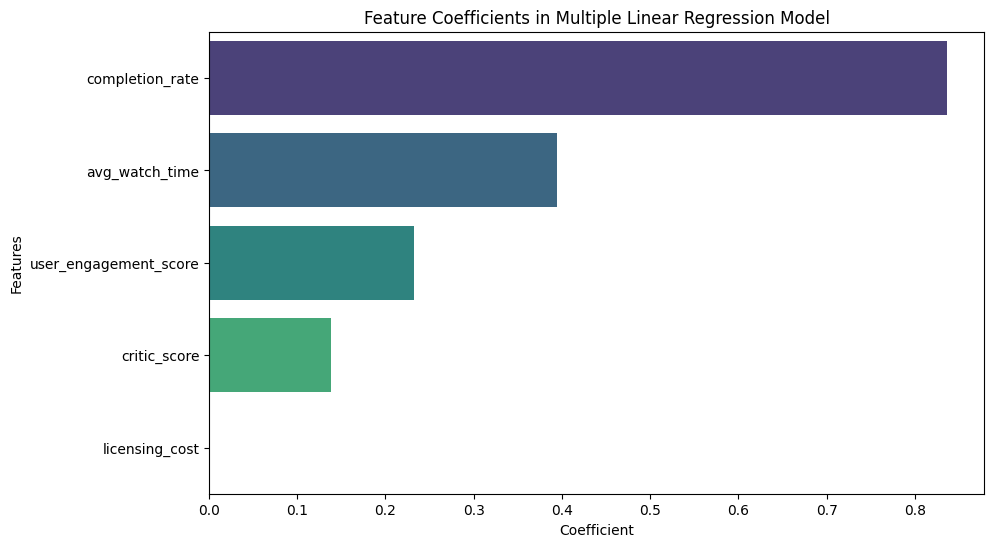

In [13]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection based on correlation analysis
features = [
    'completion_rate',
    'user_engagement_score',
    'avg_watch_time',
    'critic_score',
    'licensing_cost',
    ]


# Assuming your DataFrame is named 'train'
X = train[features]
y = train['user_retention_scaled']  # Target variable

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Multiple Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr_model.predict(X_test)

# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Coefficients Analysis (Feature Importance)
coefficients = lr_model.coef_
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot Feature Coefficients using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis')

# Add labels and title
plt.title('Feature Coefficients in Multiple Linear Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

In [14]:
# Your code here, along with reasoning# Load the test dataset
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

# Feature selection from the test dataset (same features used for training)
X_test_final = test[features]

# Predicting user retention for the test dataset using the Linear Regression model
test['user_retention'] = lr_model.predict(X_test_final)

# Check the first few rows of the updated test dataset with predictions
test.head()


content_id                                              title content_type  \
0      155632                  Pulsating the Eternal Tale (AG4P)  Documentary   
1       52115                   Arcane Legend: A Spy Tale (NFVT)        Movie   
2      758980                           The Neon Grimoire (9RHA)        Movie   
3      377922  Pulsating through the Dreamscape: The Mega Mirage        Movie   
4      202798                            The Turbo Enigma (D23S)        Movie   

    genre   sub_genre  release_year language country_of_origin  \
0  Comedy       Crime          1999   Korean               USA   
1  Sci-Fi  Historical          2014  English               USA   
2   Drama     Mystery          2014  English               USA   
3  Comedy     Mystery          2021   French       South Korea   
4  Comedy       Crime          2009  English           Germany   

  content_age_rating        budget  ...  completion_rate   total_views  \
0                 PG  4.683195e+06  ...        80.822427  42161.730510   
1                 PG  3.814252e+06  ...        82.671797   4496.565270   
2              PG-13  9.512836e+06  ...        86.420889  17844.468549   
3              PG-13  7.115981e+06  ...        74.708459    354.307774   
4                  G  3.531398e+06  ...        74.798825   2165.593265   

   avg_watch_time       revenue  awards  critic_score  user_engagement_score  \
0        9.625067  14859.234244       4     53.737682              83.156788   
1       18.844670   1261.123903       5     79.328075             120.000000   
2       25.427011   3464.497869       5     93.954789             117.015037   
3        9.504962    308.468153       4     41.203464              80.498857   
4       14.426557   1136.282205       1     51.106721              92.280388   

   marketing_spend  licensing_cost  user_retention  
0     2.256387e+06    10744.952770       35.547504  
1     7.938047e+05      689.002186       50.495254  
2     3.428071e+06     1649.461329       57.784684  
3     1.801149e+06       74.148614       25.543319  
4     7.737343e+05      520.776943       31.773576  

[5 rows x 23 columns]

In [15]:
# Prepare submission DataFrame with the required columns
submission = pd.DataFrame()
submission['title'] = test['title']  # Assuming 'title' exists in the test dataset
submission['user_retention'] = test['user_retention']

# Save the submission file as CSV
submission.to_csv('submission.csv', index=False)

# Check the first few rows of the submission file
submission.head()

title  user_retention
0                  Pulsating the Eternal Tale (AG4P)       35.547504
1                   Arcane Legend: A Spy Tale (NFVT)       50.495254
2                           The Neon Grimoire (9RHA)       57.784684
3  Pulsating through the Dreamscape: The Mega Mirage       25.543319
4                            The Turbo Enigma (D23S)       31.773576

Model Development:

A Multiple Linear Regression (MLR) model is developed to predict user retention based on selected features: completion_rate, user_engagement_score, avg_watch_time, critic_score, and licensing_cost.
Feature Selection and Impact:

Feature Selection: Features are chosen based on their correlation with user retention.
Coefficient Analysis: The model coefficients are analyzed to determine the importance of each feature. Features with larger coefficients have a greater impact on user retention.
Model Evaluation:

Metrics: The model's performance is evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) scores. These metrics indicate how well the model predicts user retention and the accuracy of the predictions.
Visualization:

Feature Coefficients: A bar plot is created to visualize the coefficients of each feature, highlighting their relative importance in the model.
Prediction and Submission:

Test Dataset Prediction: The trained model is used to predict user retention on a test dataset.
Submission Preparation: Predictions are saved into a CSV file with movie titles and predicted user retention values, ready for submission.
By analyzing the feature coefficients and model performance metrics, you gain insights into which factors most significantly affect user retention, allowing for informed decisions to optimize content strategy on Streamly.

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 